### Eine kurze Einführung in neuronale Netze

Der folgende Text soll eine konzeptionelle Einführung in neuronale Netze bieten. Nach der generellen Erklärung des Konzeptes wird ein einfaches Netz anhand eines Python-Codes veranschaulicht.
Als Arbeitsbeispiel dient hier die Erkennung handgeschriebener Ziffern. Diese Aufgabe ist das Standardanwendungsbeispiel für die Einführung in machine learning. Sie ist einerseits sehr intuitiv, andererseits sehr komplex. Für uns ist Ziffernerkennung keine schwere Aufgabe. Unser Gehirn bewältigt sie mehrmals am Tag so problemlos, dass wir meistens nicht mal etwas davon merken. Trotzdem können wir nicht sagen, wie *genau* wir diese Erkennung schaffen; und es wäre vermutlich für die meisten Menschen unmöglich, diesen Prozess in einem Algorithmus zu konkretisieren. Sogar ein "basales" neuronales Netz kann diese Aufgabe gut bewältigen. Ein weiterer Vorteil dieses Beispieles ist, dass bereits ein einfach benutzbarer Datensatz für Trainings- und Testmengen existiert, die MNIST database of handwritten digits. Sie beinhaltet 70,000 Bilder handgeschriebener Ziffern. Die einzelnen Bilder sind 28x28 Pixel groß und monochrom. Wir werden sehen, dass keine aufwendige Umstrukturierung der Daten notwendig ist, um sie als Input für unser neuronales Netz zu benutzen.

#### Die allgemeine Idee

Die Idee, die hinter neuronalen Netzen steht, ist, einen Algorithmus zu prouzieren, der aus einer großen Datenmenge, den Trainingsbeispielen, lernt. Wir hoffen, dass unser neuronales Netz, wenn wir ihm - in unserem Fall - 60,000 verschiedene Bilder von handgeschriebenen Ziffern zeigen, Muster erkennt und weitere Bilder handgeschriebener Ziffern klassifizieren kann.  
Der kleinste Bestandteil eines neuronalen Netzes ist, wie der Name nahelegt, ein Neuron. Erst einmal reicht es, sich ein Neuron als etwas vorzustellen, dass eine Zahl speichert - konkret eine Zahl zwischen 0 und 1. Diese Zahl nennen wir die Aktivierung des Neurons.  
Die einzelnen Neuronen des Netzwerkes sind in sogenannten Layern sortiert, sozusagen Vektoren von Neuronen. Das erste Layer ist das Input-Layer. In unserem Fall wird es 784 Neuronen enthalten, die die einzelnen Grauwerte der Pixel des zu klassifizierenden Bildes repräsentieren. Das letzte Layer, das Output-Layer, soll 10 Neuronen enthalten, von denen jeder repräsentiert, wie sicher sich das Netzwerk ist, dass es sich bei dem Bild im Input-Layer um eine bestimmte Zahl handelt. Unsere Hoffnung ist, dass, wenn wir das Bild einer 3 in das Input-Layer speisen (und das Netzwerk genug gelernt hat), die Aktivierung des dritten Neurons im Output-Layer hoch ist und die Aktivierung aller anderen Neuronen niedrig.
Zwischen dem Input- und dem Output-Layer liegen noch sogenannte Hidden Layer. Ihre Größe und Anzahl können wir selbst wählen und wir werden versuchen, ein wenig mit ihnen herumzuprobieren und beobachten, wie sich Änderungen dort auf die Effizienz des Netzwerkes auswirken.  
Die Aktivierungen eines Layers sollen die Aktivierungen des nächsten Layers beeinflussen. Dafür wird jedes Layer mit dem darauf folgenden durch Kanten verbunden, jedes Neuron im ersten hat eine Kante zu jedem Neuron im zweiten Layer, dort wiederum hat jedes Neuron eine Kante zu jedem Neuron im dritten Layer und so weiter bis zum Output-Layer. Die Kanten sind nicht mehr als Zahlen, Gewichtungen oder weights genannt, die determinieren, wie die Aktivierungen in einem Layer aussehen, und zwar in Abhängigkeit der Aktivierungen des vorherigen Layers. Wir können uns die Kanten zwischen zwei Layern als eine Übergangsmatrix vom vorherigen zum nächsten Layer. Tatsächlich werden die Aktivierungen des nächsten Layers im Grunde so berechnet.  
Außerdem bekommt jedes Neuron in den Layern hinter dem Input-Layer einen Bias, eine Zahl, die, grob gesagt, bestimmt, "wie leicht" es ist, die Aktivierung dieses bestimmten Neurons zu verändern. Unser Input-Layer wir nicht gebiased sein.
Wie genau berechnen jetzt sich die Aktivierungen der Neuronen des nächsten Layers aus den Aktivierungen des vorherigen Layers? Zuerst berechnen wir die Produkte aller Aktivierungen des vorherigen Layers und den Gewichtungen, die das Neuron, dem die Aktivierung gehört, mit dem Neuron, dessen Aktivierung wir berechnen wollen. Diese Produkte summieren wir auf. (Bis jetzt ist nicht mehr passiert als normale Matrix-Vektor-Multiplikation, wenn wir das vorherige Layer als Vektor und die Kanten zwischen den Layers als Übergangsmatrix interpretieren.) Zu dieser Summe addieren wir den Bias des Neurons, dessen Aktivierung wir berechnen wollen. Da wir wollen, dass die Aktivierung zwischen 0 und 1 liegt, wenden wir dann noch eine Funktion an, die das tut. Eine Funktion, die üblicherweise dafür benutzt wird, ist die Sigmoidfunktion:
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
  
Die Sigmoidfunktion auf einen Vektor angewandt heißt nicht mehr, als sie auf jede Komponente des Vektors anzuwenden.
Letztendlich ist die Formel für die Aktivierungen eines Layers l also:  
  
$$ a_l = \sigma( W_{l-1->l} \cdot a_{l-1} + b_l ) $$  
  
$ W_{l-1->l} $ ist hier die Übergangsmatrix zwischen Layer l-1 und Layer l, $a_{l-1}$ ist der Aktivierungsvektor des l-1-ten Layers und $b_l$ der Biasvektor des l-ten Layers.  
Ein Neuron ist für uns jetzt nicht mehr nur etwas, das eine bestimmte Aktivierung hat, sondern eine Funktion, die alle Aktivierungen des vorherigen Layers in Abhängigkeit der Gewichtungen und einem Bias zu einer Zahl zwischen 0 und 1 verarbeitet. Und wirklich mehr als eine Funktion ist unser gesamtes neuronales Netz nicht! Der Input der Funktion ist ein Vektor von 784 Grauwerten, der dann Layer für Layer weiterverarbeitet wird, bis wir einen Output in der Form eines Aktivierungsvektors der Länge 10 bekommen. Diese Funktion ist natürlich abhängig von einer großen Menge an Parametern, nämlich den Gewichtungen und Biases der einzelnen Layer, aber mehr als eine solche Funktion ist unser Netz letztendlich nicht.  

#### Der Lernprozess

Wir wissen jetzt also, wie unser neuronales Netz einen Outputvektor in Abhängigkeit eines Pixelvektors und seiner Gewichtungen und Biases ausgibt. Doch wie können wir das Netz darauf trainieren, dass der Outputvektor so aussieht, wie wir gerne möchten, je nach dem, welche Ziffer wir auf dem Bild erkennen? Hier kommt die Idee von machine learning ins Spiel. Die Idee wird sein, dass wir dem Netz eine große Menge Trainingsbeispiele zeigen und es sie klassifizieren lassen. Anfangs wird diese Klassifikation natürlich noch sehr schlecht und ungenau ausfallen. Den resultierenden Output-Vektor vergleichen wir mit unserem erwarteten Output-Vektor und lassen das Netzwerk seine Gewichtungen uns Biases so anpassen, dass in Zukunft bei gleichem Input ein Output ausgegeben wird, der unserem erwarteten Output mehr ähnelt als der vorherige Output. Und hoffentlich, wenn wir dem Netz sehr viele Bilder zeigen, wird es irgendwann generelle Muster in den Bildern erkennen können, die es ihm erlauben, auch Bilder korrekt zu klassifizieren, die es noch nicht gesehen hat.  
Zuerst initialisieren wir alle Gewichtungen und Biases zufällig. Natürlich wird der Output unseres Netzes (sehr wahrscheinlich) falsch sein. An dieser Stelle führen wir eine Funktion ein, die wir die Kostenfunktion des Netzes nennen. Sie soll uns, nachdem wir n Beispiele x getestet haben, ausgeben, "wie schlecht" das Netz arbeitet.
$$ C(w, b) = \frac{1}{2n} \sum_x \| y(x) - a\|^2 $$
w sind hier die Gewichtungen und b die Biases des Netzwerkes, x sind die Trainingsbeispiele und a ist der Output des Netzes. a hängt natürlich von w und b ab. y(x) ist der erwartete Output des Netzes, also wenn x das Bild einer 3 repräsentiert, ist $ y(x) = (0,0,0,1,0,0,0,0,0,0)^T $. $ \|v\| $ steht für die Länge des Vektors v. C nennen wir die * quadratische Kostenfunktion *.  
Inwiefern macht es Sinn, diese Funktion so zu definieren? Zuerst einmal ist C nichtnegativ, das heißt C > 0, da jeder Summand nichtnegativ ist. Außerdem wird C groß sein, wenn y(x) und a in vielen der Trainingsbeispiele sehr unterschiedlich sind; und C wird klein, wenn y(x) und a oft ähnlich sind. Das Ziel unseres Lernprozesses wird es sein, C zu minimieren, das heißt, eine Konfiguration des Gewichtungen und Biases unseres Netzes zu finden, sodass C(w, b) möglichst klein ist.  
Und das ist eigentlich alles, was hinter dem Lernprozess steckt! Wenn die Kostenfunktion des Netzwerkes gering wird, klassifiziert es die Trainingsbeispiele sehr wahrscheinlich ungefähr so, wie unser erwarteter Output ist. Dann können wir den Output des Netzes über eine Menge Testbeispiele, die kein Teil der Trainingsbeispiele waren, und beobachten, ob es "gelernt" hat, auch unbekannte Bilder zu klassifizieren.

#### Stochastischer Gradientenabstieg

Der nächste Schritt ist also, einen Algorithmus zu finden, der das Minimum der Kostenfunktion ermittelt. Wir werden das Minimum nicht explizit ermittlen; das ist zwar manchmal möglich, aber nicht immer geeignet, vor allem in einer so hochdimensionalen Funktion wie der Kostenfunktion. Was wir stattdessen machen werden, ist, zu schauen, "in welche Richtung" wir von unserem momentanen Punkt gehen müssen, damit die Funktion am schnellsten abnimmt. In dieser Richtung schauen wir wieder, in welche Richtung wir gehen müssen. Je öfter wir das machen, desto näher kommen wir an ein lokales Minimum der Funktion. Wenn wir dazu die Größe der Schritte proportional zur Stärke des Abstieges wählen, können wir auch nicht über das Minimum springen, sondern nähern uns von einer Seite immer weiter an. Das Bild, an das man dabei (in zwei oder drei Dimensionen) denken kann, ist ein Ball, der einen Berg herunter rollt. Das Bild ist zwar nicht hilfreich in so vielen Dimensionen, aber im Grunde ist die Idee die gleiche. Wir müssen wissen, wie wir die einzelnen Inputs der Funktion ändern müssen, damit der Output schnell kleiner wird. Nur ändern wir eben nicht eine oder zwei Koordinaten, sondern alle Gewichtungen und Biases.  
Die mathematische Operation, die wir brauchen, ist der *Gradient* der Kostenfunktion. Der Gradient einer Funktion ist der Vektor des "steilsten" Anstiegs der Funktion an einem bestimmten Punkt, und - wenig überraschend - ist der negative Gradient der Vektor des "steilsten" Abstieges. Der negative Gradient der Kostenfunktion gibt uns also die Änderungen an den Gewichtungen uns Biases, die wir vornehmen müssen, um die Kostenfunktion möglichst schnell zu minimieren. Den ermitteln wir, indem wir das Netzwerk ein Trainingsbeispiel klassifizieren lassen, den tatsächlichen Output mithilfe der Kostenfunktion mit dem erwarteten Output vergleichen, den Gradienten der Kostenfunktion ermitteln und anschließend die Gewichtungen und Biases entsprechend anpassen.  
Der Algorithmus, der uns diesen Gradienten liefert, nennt sich *Backpropagation*. Ich werde hier nicht weiter auf Backpropagation eingehen, für unsere Zwecke reicht es, zu wissen, dass es den Algorithmus gibt und er den Gradienten der Kostenfunktion unseres Netzes  ausgibt. Wen die Mathematik hinter der Backpropagation interessiert, kann sich im zweiten Kapitel von [Nielsen (2015)](http://neuralnetworksanddeeplearning.com/chap2.html) informieren.  
Letztendlich werden wir jedoch nicht nach jedem Trainingsbeispiel einen Schritt nach unten machen, sondern den durchschnittlichen Gradienten von einer bestimmten Anzahl Trainingbeispiele, ein Mini-Batch, ermitteln, ohne zwischen der Ermittlung des Gradienten das Netzwerk anzupassen, und die Gewichtungen und Biases entsprechend dem durchschnittlichen Gradienten anpassen. Der entscheidende Vorteil dieses Verfahrens, stochastischer Gradientenabstieg genannt, ist, dass es in der programmierten Realisierung wesentlich schneller läuft als wenn man für jedes Beispiel alle Gewichtungen und Biases anpassen würde.

### Ein paar notwendige Routinen vorweg ###

#### Die "MNIST database of handwritten digits" ####

Die [MNIST-Datenbank](http://yann.lecun.com/exdb/mnist/) ist eine von Yann LeCun, Corinna Cortes und Christopher J.C. Burges. zusammengestellte Datenbank mit 70,000 Schwarz-Weiß-Bildern von handgeschriebenen Ziffern mit dazugehörigen Labels, aufgeteilt in ein Trainingset mit 60,000 und ein Testset mit 10,000 Bildern und Labels.
Die Ziffern in den einzelnen Sets stammen ungefähr zur Hälfte von Highschool-Schülern und zur Hälfte von MitarbeiterInnen des United States Census Bureaus. Geammelt wurden die Daten vom Unites States National Institute of Standards and Technology (NIST) und in zwei Sets, Special Database 1 (mit den von den Highschool-Schülern geschriebenen Ziffern) und Special Database 3 (mit den von den MitarbeiterInnen des Census Bureaus geschriebenen Ziffern) zusammengefasst. 
Mithilfe des Codes unten deklarieren wir vier Arrays: x_train und x_test beinhalten die 60,000 bzw. 10,000 Bilder aus dem Trainings- bzw. Testset. Konkret ist jeder Eintrag dieser Arrays ein Array mit 784 Integern von 0 bis 255. Jeder Eintrag repräsentiert den Grauwert eines Pixels des Bildes. t_train und t_test beinhalten die zu den Bildern gehörigen Zahlen als Integer. x_train[0] zum Beispiel ist das Bild einer 5, also ist t_train[0] = 5.

In [1]:
import mnist
import numpy as np
import random
import matplotlib.pyplot as plt
mnist.init()
x_train, t_train, x_test, t_test = mnist.load() # Initialisierung der Trainings- und Test-Array-Variablen wie oben beschrieben

Download complete.
Save complete.


Zunächst einmal wollen wir eine Möglichkeit haben, uns unsere Zahlen anzeigen zu lassen. Wir benutzen dafür imshow aus matplotlib.pyplot.
imshow benötigt aber nicht ein Array von der Länge 784 (wie die Arrays in x_train und x_test), sondern ein 28x28-Array mit den Pixelwerten. Die Konvertierung übernimmt die Funktion *bildconv*:

In [2]:
def bildconv(bild):
    pixellist = []                                      # Wir erstellen eine leere Liste "pixellist".
    for i in range(28):                                 
        pixellist.append([])                            # Wir erstellen 28 Zeilen
        for j in range(28):
            pixellist[i].append(bild[i*28 + j])         # und füllen diese mit je 28 Einträgen aus dem ursprünglichen Array.
    return pixellist                                    # 28x28-array bestehend aus 28 Zeilen mit 28 Werten/Spalten pro Zeile

Den Output dieser Funktion können wir als Eingabewert für imshow aus matplotlib verwenden und mit dem dazugehörigen Wert aus t_train vergleichen:

In t_train steht, dass das ausgewählte Beispiel aus x_train eine 4 ist.


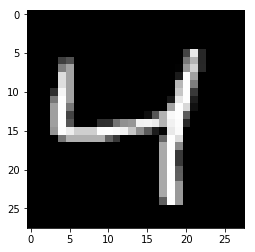

In [9]:
imnumber = 2 # imnumber wird genutzt, um ein Beispiel aus dem Set x_train auszuwählen, dem an entsprechender Stelle in t_train die geschriebene Ganzzahl korrelliert.
    
imgplot = plt.imshow(bildconv(x_train[int(imnumber)]), cmap="gray")
print("In t_train steht, dass das ausgewählte Beispiel aus x_train eine",t_train[int(imnumber)],"ist.")

Als nächstes brauchen wir eine Funktion, die den erwarteten Output-Vektor des Netzes in Abhängigkeit der erwarteten Zahl ausgibt. In t_train und t_test stehen ja Integer. Unser Netz wird aber einen Vektor der Größe 10 haben, wobei der n-te Eintrag die Zahl n repräsentiert. Um die Einträge in t_train und t_test also mit den Outputs unseres Netzes vergleichen zu können, müssen wir einen Vektor der Größe 10 erstellen, dessen Einträge v_t für $t\neq n$  0 sind und für $t = n$ 1.

In [4]:
def vectorized_result(j):
    temp = np.zeros(10)
    temp[j] = 1.0
    return temp # 10-Komponenten-Vektor mit dem Wert 1 an der Stelle j

Noch zwei notwendige Funktionen: Die Sigmoidfunktion, die wir anstatt einem Threshold benutzen werden, um die Aktivierungen der Neuronen zwischen 0 und 1 zu halten, und ihre Ableitung, die für die Backpropagation benötigt wird. Wir benutzen also keine binären Aktivierungen.

$$ Sigmoid(x) = \frac{1}{1 + e^{-x}} $$

Da exp(-x) für kleine x sehr schnell sehr groß wird und Overflow in Python verursacht, benutzen wir eine andere Schreibweise der Sigmoidfunktion. Durch Erweitern des Bruches mit $ e^x $ erhalten wir:

$$ Sigmoid(x) = \frac{e^x}{e^x+1} $$

Für kleine x ist die untere Schreibweise numerisch stabiler.

In [5]:
def sigmoid(z):                             # Die Sigmoidfunktion, angewandt auf jeden Eintrag eines Vektors
    temp = []
    for i in z:
        temp.append(sigmoidint(i))
    return temp
def sigmoidint(z):                          # Die Sigmoidfunktion, angewandt auf eine einzelnen Integer
    if z >= 0:
        return 1 / (1 + np.exp(-z))
    else:
        return np.exp(z) / (1 + np.exp(z))

def sigmoid_prime(z):                       # Die erste Ableitung der Sigmoidfunktion, wie oben
    temp = []
    for i in z:
        temp.append(sigmoidint(i)*(1-sigmoidint(i)))
    return temp

def sigmoid_primeint(z):
    return sigmoidint(z)*(1-sigmoidint(z))

<h3>Die Funktionen des Netzwerkes</h3>

Wir werden das Netz als Klasse *Network* aufbauen. Im Folgenden werde ich die Methoden der Klasse näher erklären.

#### *feedforward(self, a)*
Diese Funktion gibt den Output des Netzes in Abhängigkeit eines Inputs a aus. Wir iterieren über alle weights und biases und speichern mit jeder Iteration a die Aktivierungen des jeweils nächsten Layers. Vor der ersten Iteration repräsentiert a einfach nur das Input-Layer, nach der ersten Itreation repräsentiert a das zweite Layer, und so weiter.

#### *cost_derivative(self, output_activations, y)*

Wir benutzen die quadratische Kostenfunktion

C_x(w, b) = ( ||(y(x)) - a|| ^2 ) / 2 ,

wobei x ein Input ist, y(x) der erwartete Output und a der tatsächliche Output. (Dieser tatsächliche Output hängt natürlich von den
weights und biases des Netzwerkes, sowie vom Input x ab.)
Diese Kostenfunktion bestimmt den Fehler des Netzwerkes für einen einzelnen Input. Für die Kostfunktion des gesamten Netzwerkes würde man den Durchschnitt
von C_x über n Inputs berechnen. 
Die Kostenfunktion selbst brauchen wir nicht, wir benötigen für die Backpropagation nur ihre Ableitung.

Jetzt zu dem Code für das Netzwerk selbst:

In [6]:
class Network(object):

    def __init__(self, sizes):
        
        """Das Array sizes besteht aus den Größen der einzelnen Layer unseres Netzwerkes. In unserem Fall wäre sizes also [784, n, 10], wobei n die Größe unseres Hidden Layers
        repräsentiert. Im Folgenden werden die weights und biases zufällig gesetzt. Das erste Layer bekommt keine biases, da wir es als Input-Layer benutzen.
        Die biases werden also nur benutzt, um die Aktivierungen der späteren Layer zu berechnen."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(i) for i in sizes[1:]]       #biases ist jetzt eine Liste von Arrays, die die (zufällig gesetzten) biases pro Layer repräsentieren.
                                                                    #Die Länge von biases entspricht der Länge von sizes, die Länge jedes einzelnen Arrays in biases entspricht
                                                                    #dem entsprechenden Eintrag in sizes.
        self.weights = [np.random.randn(i, j) for j, i in zip(sizes[:-1], sizes[1:])]  
                                                                    #weights ist eine Liste, in der die einzelnen Matrizen gespeichert werden, die die Layers miteinander
                                                                    #verbinden. Bei weights[1] findet sich also die Matrix, die das zweite mit dem dritten layer verbindet.
    
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.add(np.dot(w, a),b))
        return a
    
    
    def SGD(self, training_data, epochs, mini_batch_size, eta):
        
        n = len(training_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            print("Epoche",j+1,"beendet.")
    """Wir wenden Stochastic Gradient Descent auf das Netzwerk an."""
                
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
                                                                                #Diese Zeile macht die meiste Arbeit. Der Backpropagation-Algorithmus wird unten definiert
                                                                                #und erklärt. Kurz gesagt gibt er die Ableitung der Kostenfunktion an der Stelle, an der sich das
                                                                                #Netzwerk momentan befindet. Der Output ist ein Tupel mit den einzelnen Werten der weights und
                                                                                #biases, mit der gleichen Formatierung wie weights und biases. Mithilfe der Ableitung können wir
                                                                                #die Kostenfunktion nach und nach minimieren.
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                                                                                #In nabla_b und nabla_w speichern wir die durchschnittlichen Änderungen, die wir an
                                                                                #weights und biases vornehmen müssen, die wir mithilfe des Mini-Batches berechnen.
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
                                                                                #Dann passen wir die weights und biases entsprechend an.
            
            
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), np.argmax(y)) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
                                                                                #Diese Funktion lässt das Netzwerk die test_data durchgehen und
                                                                                #gibt die Anzahl der richtigen Antworten des Netzwerkes aus.
    
    def backprop(self, x, y):
        """Diese Funktion gibt den Gradienten der Kostenfunktion in Bezug auf die weights und biases aus. Die Ausgabe findet als Tupel (nabla_b, nabla_w)
        statt, in der gleichen Form wie weights und biases. So können wir den Gradienten in update_mini_batch intuitiv verwenden."""
        deltas = [np.zeros(i) for i in self.sizes[0:]] # deltas speichert die Fehler, den das Netz pro Layer produziert.
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # In activations speichern wir die Aktivierungen der einzelnen Layer.
        zs = [] # In zs speichern wir die einzelnen Layer, bevor die Sigmoid-Funktion angewandt wird.
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        deltas[-1] = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            deltas[-l] = np.dot(np.transpose(self.weights[-l+1]), deltas[-l+1]) * sp

        for l in range(len(nabla_w)):
            nabla_w[l] = np.outer(deltas[l+1], np.asarray(activations[l]).transpose())
            
        return (deltas[1:], nabla_w)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
    
        

In [7]:
training_data = []
test_data = []

for i, j in zip(x_train, t_train):
    training_data.append((i/255,vectorized_result(j)))
    
for i, j in zip(x_test, t_test):
    test_data.append((i/255,vectorized_result(j)))


[0.9727716303123116, 0.2647018929489321, 0.0024041746618560836, 0.63005130294358, 0.02663027746162897, 0.1456827626751845, 0.23303894534182654, 0.001644230579216315, 0.5944262912638074, 0.08783202254777694]
Ich bin mir zu 97.27716303123117 % sicher, dass das eine 0 ist.


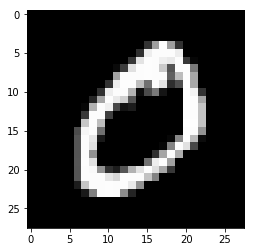

In [8]:
net = Network([784, 20, 10])
example = 1
outp = net.feedforward(x_train[example])
print(outp)
print("Ich bin mir zu", np.amax(outp)*100,"% sicher, dass das eine",np.argmax(outp),"ist.")
imgplot = plt.imshow(bildconv(x_train[example]), cmap="gray")

Versuchen wir nun, das Netzwerk mithilfe der MNIST-Training-Data zu trainieren. Versuchen wir es mit einem Hidden Layer mit 20 Neuronen, 30 Epochen, einer Mini-Batch-Größe von 10 und einer Lernrate eta = 3.0

In [ ]:
net.SGD(training_data, epochs = 30, mini_batch_size = 10, eta = 3.0)

evaluation = net.evaluate(test_data)

print("Ich habe von",len(test_data),"Beispielen im Test-Set",evaluation,"richtig klassifiziert. Das entspricht einer Genauigkeit von",(evaluation/len(test_data))*100,"%.")


In [ ]:
example = 9888
outp = net.feedforward(x_test[example])
print(outp)
print("Ich bin mir zu", np.amax(outp)*100,"% sicher, dass das eine",np.argmax(outp),"ist.")
imgplot = plt.imshow(bildconv(x_test[example]), cmap="gray")
print("Eigentlich ist es eine",t_test[example],".")

In [ ]:
example_array = np.random.randn(784)
outp = net.feedforward(example_array)
print(outp)
print("Ich bin mir zu", np.amax(outp)*100,"% sicher, dass das eine",np.argmax(outp),"ist.")
imgplot = plt.imshow(bildconv(example_array), cmap="gray")

In [ ]:
net2 = Network([784, 300, 200, 10])

net2.SGD(training_data, epochs = 2, mini_batch_size = 10, eta = 3.0)

evaluation = net2.evaluate(test_data)

print("Ich habe von",len(test_data),"Beispielen im Test-Set",evaluation,"richtig klassifiziert. Das entspricht einer Genauigkeit von",(evaluation/len(test_data))*100,"%.")


In [ ]:
example = 9888
outp = net2.feedforward(x_test[example])
print(outp)
print("Ich bin mir zu", np.amax(outp)*100,"% sicher, dass das eine",np.argmax(outp),"ist.")
imgplot = plt.imshow(bildconv(x_test[example]), cmap="gray")
print("Eigentlich ist es eine",t_test[example],".")

## Litaratuar ##

MNIST-Seite: http://yann.lecun.com/exdb/mnist/